In [129]:
# credit_card_fraud_detection.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Step 1: Load dataset
df = pd.read_csv("C:/Users/Hp/Internship/creditcard.csv")

In [131]:
# Step 2: Explore class imbalance
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [132]:
# Step 3: Preprocessing
X = df.drop(['Class', 'Time'], axis=1)  # Drop Time and target
y = df['Class']

In [136]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [137]:
# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [138]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [139]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [140]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

In [141]:
# Step 8: Evaluate the model
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Genuine", "Fraudulent"]))

 Classification Report:

              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



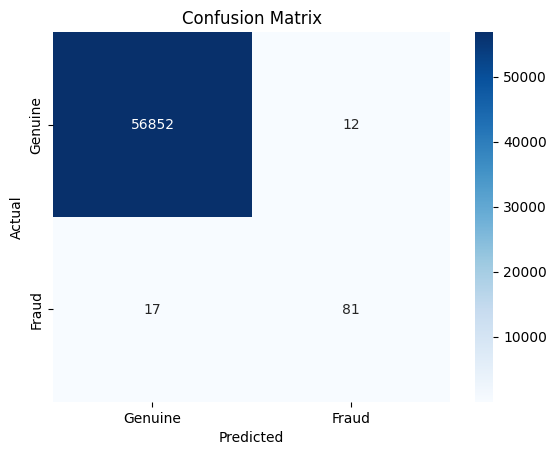

In [142]:
# Step 9: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Genuine", "Fraud"], yticklabels=["Genuine", "Fraud"], cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [143]:
import numpy as np
print("\n True class distribution in test set:")
print(y_test.value_counts())

print("\n Predicted class distribution:")
print(pd.Series(y_pred).value_counts())

print("\n Model accuracy:", np.mean(y_pred == y_test))


 True class distribution in test set:
Class
0    56864
1       98
Name: count, dtype: int64

 Predicted class distribution:
0    56869
1       93
Name: count, dtype: int64

 Model accuracy: 0.9994908886626171
